In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm  # Import tqdm for progress tracking
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from datetime import timedelta

In [2]:
sales_data = pd.read_csv("../../dataset/sales.csv", parse_dates=['release_date'])

sales_data.sort_values(by='release_date', ascending=True, inplace=True)
sales_data.drop(columns=['Unnamed: 0','image_path','restock'], inplace=True)
sales_column_names = {'0':'w1_sales','1':'w2_sales','2':'w3_sales','3':'w4_sales'
                    ,'4':'w5_sales','5':'w6_sales','6':'w7_sales','7':'w8_sales'
                    ,'8':'w9_sales','9':'w10_sales','10':'w11_sales','11':'w12_sales'}
sales_data.rename(columns=sales_column_names, inplace=True)
sales_data.head(5)

,external_code,retail,season,category,color,fabric,release_date,w1_sales,w2_sales,w3_sales,w4_sales,w5_sales,w6_sales,w7_sales,w8_sales,w9_sales,w10_sales,w11_sales,w12_sales
0,5,36,SS17,long sleeve,grey,acrylic,2016-11-28,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,2,51,SS17,long sleeve,violet,acrylic,2016-11-28,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
2,5,10,SS17,long sleeve,grey,acrylic,2016-11-28,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,9,41,SS17,culottes,yellow,scuba crepe,2016-11-28,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,13,SS17,long sleeve,grey,acrylic,2016-11-28,1.0,2.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [4]:
sales_data.shape

(106850, 19)

In [5]:
discount_data = pd.read_csv("../../dataset/price_discount_series.csv")
discount_column_names = {'0':'w1_discount','1':'w2_discount','2':'w3_discount','3':'w4_discount'
                    ,'4':'w5_discount','5':'w6_discount','6':'w7_discount','7':'w8_discount'
                    ,'8':'w9_discount','9':'w10_discount','10':'w11_discount','11':'w12_discount'}
discount_data.rename(columns=discount_column_names, inplace=True)
discount_data.head(5)

,external_code,retail,w1_discount,w2_discount,w3_discount,w4_discount,w5_discount,w6_discount,w7_discount,w8_discount,w9_discount,w10_discount,w11_discount,w12_discount,price
0,5,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
1,2,51,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.054944
2,5,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
3,9,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043951
4,5,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944


In [6]:
discount_data.shape

(106850, 15)

In [7]:
sales_data = sales_data.merge(discount_data, on=["external_code","retail"])
sales_data.head(5)

,external_code,retail,season,category,color,fabric,release_date,w1_sales,w2_sales,w3_sales,...,w4_discount,w5_discount,w6_discount,w7_discount,w8_discount,w9_discount,w10_discount,w11_discount,w12_discount,price
0,5,36,SS17,long sleeve,grey,acrylic,2016-11-28,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
1,2,51,SS17,long sleeve,violet,acrylic,2016-11-28,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.054944
2,5,10,SS17,long sleeve,grey,acrylic,2016-11-28,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
3,9,41,SS17,culottes,yellow,scuba crepe,2016-11-28,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043951
4,5,13,SS17,long sleeve,grey,acrylic,2016-11-28,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944


In [8]:
sales_data.shape

(106850, 32)

In [9]:
weather_data = pd.read_csv("../../dataset/vis2_weather_data.csv", parse_dates=['date'])
weather_column_names = {'locality':'w1_discount','1':'w2_discount'}
weather_data.head(5)

C:\Users\Sameera\AppData\Local\Temp\ipykernel_1784\780121790.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  weather_data = pd.read_csv("../../dataset/vis2_weather_data.csv", parse_dates=['date'])


,locality,date,avg temp °C,min temp °C,max temp °C,dew point °C,humidity %,visibility km,avg wind km/h,max wind km/h,gust km/h,slm pressure mb,avg pressure mb,rain mm
0,8,2016-01-01,6.0,2.0,11.0,2.0,69.0,10.0,9.0,13.0,0.0,1026.0,0.0,0.0
1,8,2016-02-01,9.0,2.0,14.0,5.0,69.0,10.0,11.0,17.0,0.0,1020.0,0.0,0.0
2,8,2016-03-01,12.0,8.0,15.0,10.0,86.0,9.0,12.0,22.0,52.0,1007.0,0.0,0.0
3,8,2016-04-01,11.0,6.0,14.0,8.0,85.0,9.0,10.0,17.0,0.0,1001.0,0.0,0.0
4,8,2016-05-01,13.0,10.0,16.0,11.0,86.0,9.0,10.0,19.0,0.0,1001.0,0.0,0.0


In [11]:
weather_data.shape

(89071, 14)

In [12]:
# sales_data = sales_data.merge(weather_data, left_on=['retail','release_date'], right_on=['locality','date'])
# sales_data.shape

In [13]:
sales_data = sales_data.drop(columns='retail')  # drop 'retail' column

aggregation_functions = {
    'release_date': 'min',
    'w1_sales': 'sum', 'w2_sales': 'sum', 'w3_sales': 'sum', 'w4_sales': 'sum', 'w5_sales': 'sum', 'w6_sales': 'sum', 
    'w7_sales': 'sum', 'w8_sales': 'sum', 'w9_sales': 'sum', 'w10_sales': 'sum', 'w11_sales': 'sum', 'w12_sales': 'sum',
    'w1_discount': 'mean', 'w2_discount': 'mean', 'w3_discount': 'mean', 'w4_discount': 'mean', 'w5_discount': 'mean', 'w6_discount': 'mean',
    'w7_discount': 'mean', 'w8_discount': 'mean', 'w9_discount': 'mean', 'w10_discount': 'mean', 'w11_discount': 'mean', 'w12_discount': 'mean',
    'price': 'mean'   
}


sales_data = sales_data.groupby(['external_code', 'season', 'category', 'fabric', 'color']).agg(aggregation_functions).reset_index()
sales_data.head(5)

,external_code,season,category,fabric,color,release_date,w1_sales,w2_sales,w3_sales,w4_sales,...,w4_discount,w5_discount,w6_discount,w7_discount,w8_discount,w9_discount,w10_discount,w11_discount,w12_discount,price
0,1,SS17,long sleeve,acrylic,violet,2016-12-05,15.0,11.0,8.0,9.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054944
1,2,SS17,long sleeve,acrylic,violet,2016-11-28,67.0,58.0,66.0,34.0,...,0.021818,0.031515,0.032424,0.038182,0.033636,0.045152,0.050909,0.046061,0.043939,0.056875
2,3,SS17,culottes,scuba crepe,blue,2016-12-05,7.0,7.0,3.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043951
3,4,SS17,long sleeve,acrylic,yellow,2016-12-05,11.0,7.0,10.0,7.0,...,0.036667,0.036667,0.041111,0.041111,0.044444,0.066667,0.088889,0.066667,0.044444,0.050670
4,5,SS17,long sleeve,acrylic,grey,2016-11-28,24.0,30.0,26.0,19.0,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.023333,0.023333,0.023333,0.056089


In [14]:
sales_data.shape

(5355, 31)

In [15]:
gtrend_data = pd.read_csv("../../dataset/vis2_gtrends_data.csv", parse_dates=['date'], index_col=['date'])
gtrend_data.head(5)

,long sleeve,culottes,miniskirt,short sleeves,printed shirt,short cardigan,solid color top,trapeze dress,sleeveless,long cardigan,...,scottish,milano stitch,devore,hron,ottoman,fluid,flamed,fluid polyviscous,shiny jersey,goose
date,,,,,,,,,,,,,,,,,,,,,
2015-10-05,55.0,41.0,66.0,58.0,58.0,22.0,24.0,43.0,66.0,74.0,...,57,0,29,17,57,80,49,-1.0,0,34
2015-10-12,55.0,44.0,73.0,71.0,61.0,31.0,37.0,21.2,63.0,59.0,...,54,0,17,14,61,80,41,-1.0,0,39
2015-10-19,60.0,42.0,73.0,62.0,61.0,43.0,37.0,27.4,47.0,71.0,...,55,0,21,23,63,79,52,-1.0,33,41
2015-10-26,57.0,44.0,68.0,51.0,55.0,19.0,37.0,59.8,54.0,64.0,...,55,0,26,14,58,76,33,-1.0,32,37
2015-11-02,49.0,39.0,66.0,39.0,63.0,16.0,37.0,44.0,51.0,67.0,...,55,0,18,18,60,80,37,-1.0,98,38


In [16]:
def calculate_gtrend_percentageChange(row):
    release_date = row['release_date']
    trend_startDate = release_date - pd.Timedelta(days=365)
    category = row['category']
    color = row['color']
    fabric = row['fabric']

    # Select relevant trend data for the category, color, and fabric
    relvant_trends_category = gtrend_data.get(category, pd.Series(dtype='float64')).loc[trend_startDate:release_date]
    relvant_trends_color = gtrend_data.get(color, pd.Series(dtype='float64')).loc[trend_startDate:release_date]
    relvant_trends_fabric = gtrend_data.get(fabric, pd.Series(dtype='float64')).loc[trend_startDate:release_date]
    
    # Calculate the mean percentage change for each 
    category_pct_change = relvant_trends_category.mean()
    color_pct_change = relvant_trends_color.mean()
    fabric_pct_change = relvant_trends_fabric.mean()

    return pd.Series({
        'category_pct_change': category_pct_change, 
        'color_pct_change': color_pct_change, 
        'fabric_pct_change': fabric_pct_change})

# Calculate percentage change of Google trend values for each row in the sales dataset
percentage_change_google_trends = sales_data.apply(lambda row: calculate_gtrend_percentageChange(row), axis=1)

# Join the new columns with the original sales data
sales_data = sales_data.join(percentage_change_google_trends)


In [17]:
sales_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional)
sales_data.dropna(inplace=True)

In [18]:
weather_data.groupby(['locality','date']).nunique()

avg temp °C  min temp °C  max temp °C  dew point °C  \
locality date                                                              
8        2016-01-01            1            1            1             1   
         2016-01-02            1            1            1             1   
         2016-01-03            1            1            1             1   
         2016-01-04            1            1            1             1   
         2016-01-05            1            1            1             1   
...                          ...          ...          ...           ...   
242      2019-12-27            1            1            1             1   
         2019-12-28            1            1            1             1   
         2019-12-29            1            1            1             1   
         2019-12-30            1            1            1             1   
         2019-12-31            1            1            1             1   

                     humidity %  visibility km  avg wind km/h  max wind km/h  \
locality date                                                                  
8        2016-01-01           1              1              1              1   
         2016-01-02           1              1              1              1   
         2016-01-03           1              1              1              1   
         2016-01-04           1              1              1              1   
         2016-01-05           1              1              1              1   
...                         ...            ...            ...            ...   
242      2019-12-27           1              1              1              1   
         2019-12-28           1              1              1              1   
         2019-12-29           1              1              1              1   
         2019-12-30           1              1              1              1   
         2019-12-31           1              1              1              1   

                     gust km/h  slm pressure mb  avg pressure mb  rain mm  
locality date                                                              
8        2016-01-01          1                1                1        1  
         2016-01-02          1                1                1        1  
         2016-01-03          1                1                1        1  
         2016-01-04          1                1                1        1  
         2016-01-05          1                1                1        1  
...                        ...              ...              ...      ...  
242      2019-12-27          1                1                1        1  
         2019-12-28          1                1                1        1  
         2019-12-29          1                1                1        1  
         2019-12-30          1                1                1        1  
         2019-12-31          1                1                1        1  

[89071 rows x 12 columns]

# Data Preprocessing

## Checking for missing values

In [19]:
# Check for missing values
missing_values = sales_data.isnull().sum()
# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [21]:
sales_data.dropna(inplace=True)

In [22]:
sales_data.describe()

,external_code,w1_sales,w2_sales,w3_sales,w4_sales,w5_sales,w6_sales,w7_sales,w8_sales,w9_sales,...,w7_discount,w8_discount,w9_discount,w10_discount,w11_discount,w12_discount,price,category_pct_change,color_pct_change,fabric_pct_change
count,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,...,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000
mean,2795.309804,36.422222,29.938749,28.892997,29.059197,28.410084,28.132400,26.813072,23.953315,20.965266,...,0.101179,0.127028,0.154608,0.183138,0.209877,0.233411,0.079252,56.509666,50.019839,46.066557
std,1613.924889,40.460559,37.496691,38.122656,41.123479,42.139268,45.686232,46.249740,42.948154,40.523064,...,0.132676,0.151399,0.170384,0.186883,0.201477,0.212122,0.035253,14.149588,24.241421,24.514574
min,1.000000,1.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010971,0.000000,15.396226,-1.000000
25%,1403.500000,9.000000,6.000000,6.000000,6.000000,5.000000,5.000000,4.000000,3.000000,3.000000,...,0.000000,0.004858,0.010000,0.015088,0.019597,0.025000,0.054944,51.471698,27.084906,27.075472
50%,2772.000000,23.000000,17.000000,16.000000,15.000000,14.000000,12.000000,12.000000,10.000000,8.000000,...,0.039571,0.060000,0.083333,0.112857,0.155556,0.207143,0.076843,59.509434,58.584906,40.867925
75%,4205.500000,47.000000,38.000000,35.000000,35.000000,32.500000,30.000000,27.000000,24.000000,20.000000,...,0.157018,0.225000,0.283074,0.312956,0.350455,0.395132,0.087924,64.547170,76.886792,69.754717
max,5577.000000,380.000000,396.000000,418.000000,450.000000,462.000000,518.000000,500.000000,588.000000,657.000000,...,0.750000,0.800000,0.830000,0.830000,0.830000,0.830000,0.307789,83.664151,89.943396,90.754717


## Data conssistency check and correlations

In [23]:
#Duplicates check
print("Number of duplicate rows: ", sales_data.duplicated().sum())

Number of duplicate rows:  0


In [24]:
# value consistency check
print("\nUnique values in 'season' column: ", sales_data['season'].unique())
print("\nUnique values in 'season' column: ", sales_data['color'].unique())
print("\nUnique values in 'season' column: ", sales_data['category'].unique())



Unique values in 'season' column:  ['SS17' 'AW17' 'SS18' 'AW18' 'SS19' 'AW19']

Unique values in 'season' column:  ['violet' 'blue' 'yellow' 'grey' 'brown' 'green' 'black' 'red' 'white'
 'orange']

Unique values in 'season' column:  ['long sleeve' 'culottes' 'miniskirt' 'short sleeves' 'printed shirt'
 'short cardigan' 'solid color top' 'trapeze dress' 'sleeveless'
 'sheath dress' 'short coat' 'long cardigan' 'medium coat' 'doll dress'
 'long dress' 'shorts' 'long coat' 'jumpsuit' 'drop sleeve'
 'patterned top' 'kimono dress' 'medium cardigan' 'shirt dress' 'maxi'
 'capris' 'gitana skirt' 'long duster']


In [25]:
# Date Consistency Check
# Convert 'release_date' to datetime format if it isn't
sales_data['release_year'] = sales_data['release_date'].dt.year
sales_data['releae_quarter'] = sales_data['release_date'].dt.quarter
sales_data['releae_month'] = sales_data['release_date'].dt.month
sales_data['releae_week'] = sales_data['release_date'].dt.week
sales_data['is_weekend'] = sales_data['releae_week'].isin([5, 6]).astype(int)

C:\Users\Sameera\AppData\Local\Temp\ipykernel_1784\2139682140.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sales_data['releae_week'] = sales_data['release_date'].dt.week


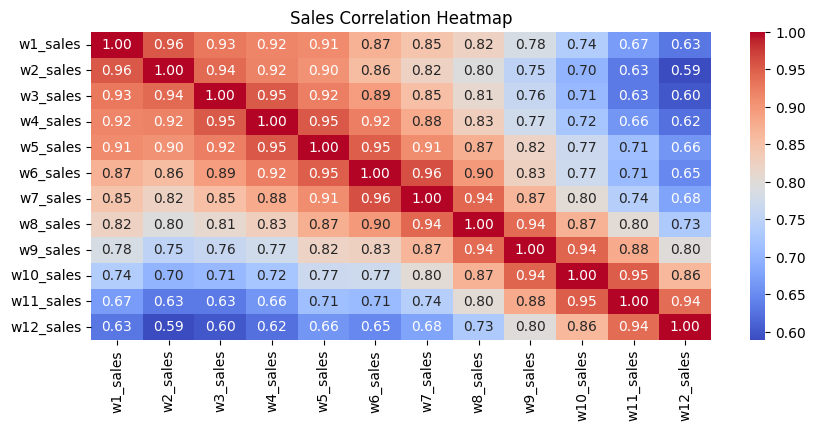

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales Correlation
sales_cols = ['w1_sales', 'w2_sales', 'w3_sales', 'w4_sales', 'w5_sales', 'w6_sales', 'w7_sales', 'w8_sales', 'w9_sales', 'w10_sales', 'w11_sales', 'w12_sales']
sales_corr = sales_data[sales_cols].corr()

# Visualize the sales correlations using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(sales_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Sales Correlation Heatmap')
plt.show()

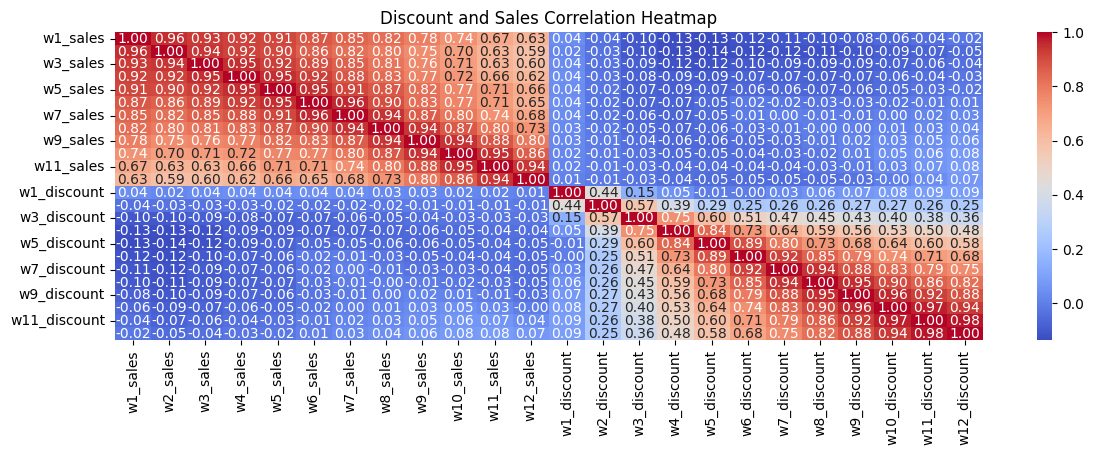

In [27]:
# Discount and Sales Correlation
discount_cols = ['w1_discount', 'w2_discount', 'w3_discount', 'w4_discount', 'w5_discount', 'w6_discount', 'w7_discount', 'w8_discount', 'w9_discount', 'w10_discount', 'w11_discount', 'w12_discount']
discount_sales_cols = sales_cols + discount_cols
discount_sales_corr = sales_data[discount_sales_cols].corr()

# Visualize the discount and sales correlations using a heatmap
plt.figure(figsize=(14, 4))
sns.heatmap(discount_sales_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Discount and Sales Correlation Heatmap')
plt.show()

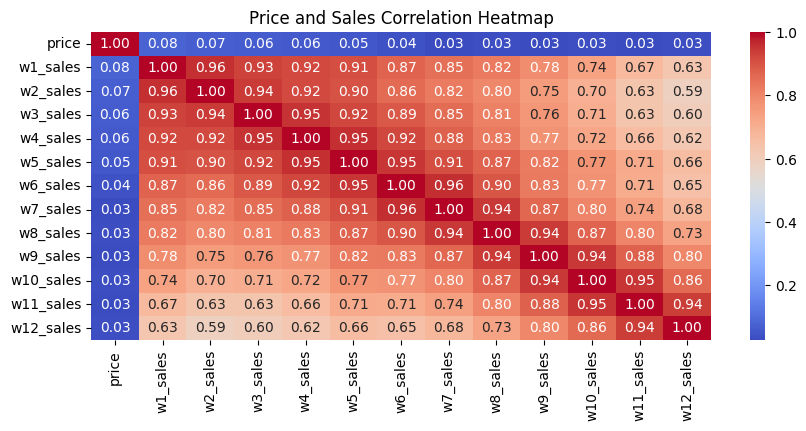

In [28]:
price_sales_cols = ['price'] + sales_cols
price_sales_corr = sales_data[price_sales_cols].corr()

# Visualize the price and sales correlations using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(price_sales_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Price and Sales Correlation Heatmap')
plt.show()

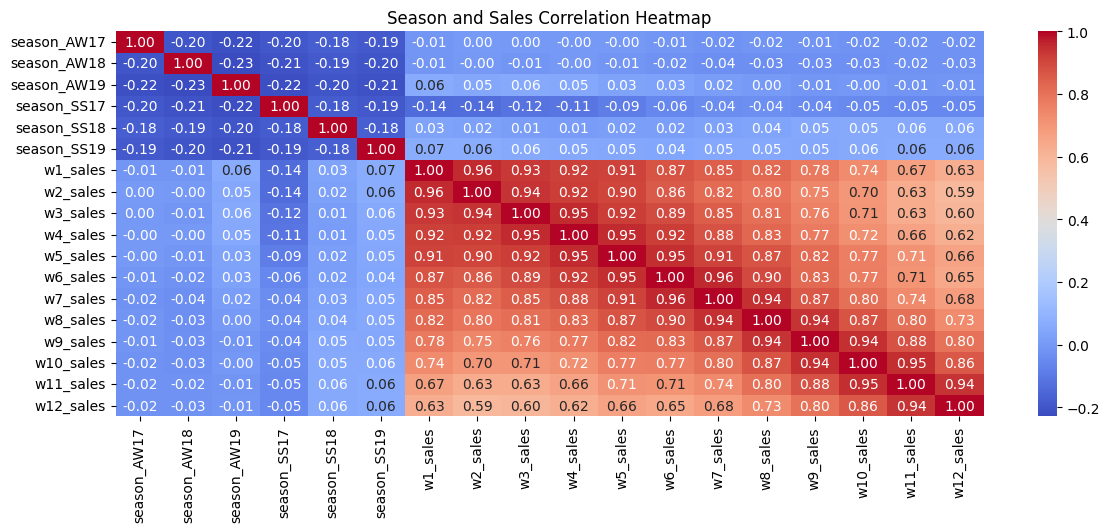

In [30]:
# Season and Sales Correlation
# Convert 'season' to categorical data type
sales_data['season'] = sales_data['season'].astype('category')
# Get dummy variables for 'season'
season_dummies = pd.get_dummies(sales_data['season'], prefix='season')
# Concatenate the original DataFrame and the dummy DataFrame
df_dummies = pd.concat([sales_data, season_dummies], axis=1)

# Select the season columns and sales columns for correlation analysis
season_sales_cols = list(season_dummies.columns) + sales_cols
season_sales_corr = df_dummies[season_sales_cols].corr()

# Visualize the season and sales correlations using a heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(season_sales_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Season and Sales Correlation Heatmap')
plt.show()

In [31]:
numeric_columns = sales_data.select_dtypes(include='number')
columns_with_negative_values = numeric_columns.columns[numeric_columns.lt(0).any()].tolist()

print(columns_with_negative_values)

['w5_sales', 'w6_sales', 'w10_sales', 'w11_sales', 'fabric_pct_change']


In [32]:
cols_to_check = ['w5_sales', 'w6_sales', 'w10_sales', 'w11_sales']
sales_data = sales_data[~(sales_data[cols_to_check] < 0).any(axis=1)]

In [ ]:
sales_data.to_csv('../../processedData/combinedSales.csv', index=False)
sales_data.sample(frac=0.1,random_state=0).to_csv('../../processedData/reduced_sales.csv', index=False)

## Outlier detection and treatment

In [33]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler

def preprocess(df):
    # List of categorical columns to encode
    cat_cols = ['category', 'color', 'fabric', 'season']

    # List of numerical columns to check for outliers
    num_cols = ['w1_sales', 'w2_sales', 'w3_sales', 'w4_sales', 'w5_sales', 'w6_sales', 'w7_sales', 'w8_sales'
                ,'w9_sales', 'w10_sales', 'w11_sales', 'w12_sales'
                ,'w1_discount', 'w2_discount', 'w3_discount', 'w4_discount', 'w5_discount', 'w6_discount', 'w7_discount', 'w8_discount'
                ,'w9_discount', 'w10_discount', 'w11_discount', 'w12_discount']
    
    # Ordinal encoding for categorical columns
    encoder = OrdinalEncoder()
    df[cat_cols] = encoder.fit_transform(df[cat_cols])
    
    # Outlier detection for numerical columns
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Replace the outliers with the median of the column
        df.loc[outliers.index, col] = df[col].median()

    # Scale numerical columns with MinMaxScaler
    # scaler = MinMaxScaler()
    # df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

# Apply the preprocessing function to the DataFrame
sales_data = preprocess(sales_data)

sales_data.head(5)


,external_code,season,category,fabric,color,release_date,w1_sales,w2_sales,w3_sales,w4_sales,...,w12_discount,price,category_pct_change,color_pct_change,fabric_pct_change,release_year,releae_quarter,releae_month,releae_week,is_weekend
0,1,3.0,11.0,0.0,7.0,2016-12-05,15.0,11.0,8.0,9.0,...,0.000000,0.054944,51.433962,53.169811,64.377358,2016,4,12,49,0
1,2,3.0,11.0,0.0,7.0,2016-11-28,67.0,58.0,66.0,34.0,...,0.043939,0.056875,51.113208,53.245283,64.188679,2016,4,11,48,0
2,3,3.0,1.0,49.0,1.0,2016-12-05,7.0,7.0,3.0,2.0,...,0.000000,0.043951,54.943396,73.962264,4.471698,2016,4,12,49,0
3,4,3.0,11.0,0.0,9.0,2016-12-05,11.0,7.0,10.0,7.0,...,0.044444,0.050670,51.433962,81.792453,64.377358,2016,4,12,49,0
4,5,3.0,11.0,0.0,4.0,2016-11-28,24.0,30.0,26.0,19.0,...,0.023333,0.056089,51.113208,17.132075,64.188679,2016,4,11,48,0


In [ ]:
sales_data.shape

In [ ]:
sales_data.to_csv('../../processedData/processedSales.csv', index=False)

In [ ]:
sales_data.head(5)